In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

# Data division and preprocessing
We need to divide our data in 3:
1) **Train** (77%)

2) **Validation** (15%)

3) **Test** (8%)

In each one we divide the data between diseased and healthy.
<br>
So, we should end up with train, validation and test of diseased plants and the same for healthy.

### What do you need to do differenty if your test data has no labels???

In the case where you do not know the labels for the test data, in the directory it will have a folder named unknown instead of one with cats/dogs or healthy/unhealthy. 
<br>
Moreover, you will need to modify the test_batches variable. Specifically, the change will be to set the parameters classes = None and class_mode = None in flow_from_directory()

```test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)`\
flow_from_directory(directory=test_path, target_size=(224,224), classes=None, batch_size = 10)```

## Data renaming (labeling)

### Unhealthy (bacterial spot aka Bspot)

In [10]:
# checking the old names
list(enumerate(os.listdir('../PlantVillageTest/Pepper_bell_Bacterial_spot')))

[(0, '47fbd17d-c078-4465-8816-c675abd9c850___JR_B.Spot 3185.JPG'),
 (1, '42ef264d-f255-4674-885a-0921a0e7f649___JR_B.Spot 9022.JPG'),
 (2, '435993b8-c7f7-47fd-85ad-bdb04ab3e8bb___JR_B.Spot 8976.JPG'),
 (3, '1fca0f2b-857b-4cef-9218-42b1bdd92d00___JR_B.Spot 8969.JPG'),
 (4, '9cee73cb-272f-4121-b82d-c8c2b3ca71a0___NREC_B.Spot 1813.JPG'),
 (5, '816dee9f-b43f-42da-b0c9-3fb8b29d511d___NREC_B.Spot 9182.JPG'),
 (6, '1694ae00-3c5f-488c-9402-e65c70c73cf2___JR_B.Spot 3179.JPG'),
 (7, '9f36da2c-ab51-4fff-b394-ad22b15508eb___JR_B.Spot 9032.JPG'),
 (8, 'c66fe682-9e42-4343-a4d4-add4d6244859___NREC_B.Spot 9131.JPG'),
 (9, 'b21d5a06-eab3-47a9-86d1-70295f8f8848___NREC_B.Spot 1940.JPG'),
 (10, '5e0a97ce-9b9d-4528-ae61-28aeab5809aa___NREC_B.Spot 1830.JPG'),
 (11, '61ff52bd-c262-4198-8067-76d89a0468a9___NREC_B.Spot 9176.JPG'),
 (12, '0558ff5a-45c7-4ea0-9479-3f71f0048208___JR_B.Spot 3183.JPG'),
 (13, '38caf650-d4c8-483d-a75d-b20f12629563___JR_B.Spot 3161.JPG'),
 (14, '3d5f977b-126e-4c4b-b6c2-5d81a69cf2d0___

In [29]:
# rename the files for the trial 
# files in a directory or folder 
  
# importing os module 
import os 
  
# Function to rename multiple files 
def main(): 
  
    for count, filename in enumerate(os.listdir('../PlantVillageTest/Pepper_bell_Bacterial_spot')): 
        root = '../PlantVillageTest/Pepper_bell_Bacterial_spot'
        src = root +'/'+ filename 
        dst =root + "/unhealthy" + str(count) + ".jpg"
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':
    
#calling the function
    main()

In [31]:
# Did the renaming work?
list(enumerate(os.listdir('../PlantVillageTest/Pepper_bell_Bacterial_spot')))

#YES IT FUCKING DID


[(0, 'unhealthy609.jpg'),
 (1, 'unhealthy153.jpg'),
 (2, 'unhealthy635.jpg'),
 (3, 'unhealthy621.jpg'),
 (4, 'unhealthy147.jpg'),
 (5, 'unhealthy812.jpg'),
 (6, 'unhealthy806.jpg'),
 (7, 'unhealthy190.jpg'),
 (8, 'unhealthy184.jpg'),
 (9, 'unhealthy379.jpg'),
 (10, 'unhealthy437.jpg'),
 (11, 'unhealthy351.jpg'),
 (12, 'unhealthy345.jpg'),
 (13, 'unhealthy423.jpg'),
 (14, 'unhealthy39.jpg'),
 (15, 'unhealthy11.jpg'),
 (16, 'unhealthy392.jpg'),
 (17, 'unhealthy386.jpg'),
 (18, 'unhealthy219.jpg'),
 (19, 'unhealthy543.jpg'),
 (20, 'unhealthy225.jpg'),
 (21, 'unhealthy231.jpg'),
 (22, 'unhealthy557.jpg'),
 (23, 'unhealthy580.jpg'),
 (24, 'unhealthy594.jpg'),
 (25, 'unhealthy769.jpg'),
 (26, 'unhealthy741.jpg'),
 (27, 'unhealthy755.jpg'),
 (28, 'unhealthy966.jpg'),
 (29, 'unhealthy972.jpg'),
 (30, 'unhealthy782.jpg'),
 (31, 'unhealthy796.jpg'),
 (32, 'unhealthy797.jpg'),
 (33, 'unhealthy783.jpg'),
 (34, 'unhealthy973.jpg'),
 (35, 'unhealthy967.jpg'),
 (36, 'unhealthy754.jpg'),
 (37, 'unheal

### Healthy 
(we repeat the same process)

In [28]:
# function to rename the healthy

def main2(): 
  
    for count, filename in enumerate(os.listdir('../PlantVillageTest/Pepper_bell_healthy')): 
        root = '../PlantVillageTest/Pepper_bell_healthy'
        src = root +'/'+ filename 
        dst =root + "/healthy" + str(count) + ".jpg"
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':
    
#calling the function
    main2()

### Data selection (sample)
We select a sample of the data just to have a look if the model works

In [4]:
# we need the paths (relative wasn't working so absolute we go)
train_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageTest/train'
valid_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageTest/valid'
test_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageTest/test'

In [5]:
# puting the data in the format of a Keras generator

'''Necessary to define the size of the images so they are all the same, it can be different
batch_size can be different too I guess'''

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['healthy', 'unhealthy'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['healthy', 'unhealthy'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['healthy', 'unhealthy'], batch_size=10, shuffle=False)

#shuffle = False for test since we need to access the unshuffled data and by default it gets shuffled

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [53]:
# grab a single batch of images and labels

imgs, labels = next(train_batches)

## Visualise the data

In [54]:
# this function will plot images in the form of a grid with the 1 row and 10 columns where the images are placed
# from the tensor flow website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

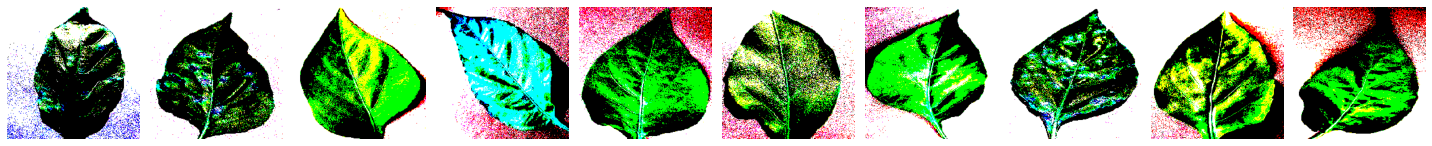

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [55]:
# it will print the BATCH
# the colours might look weird do to the preprocessing
plotImages(imgs)
print(labels)

## Building the model

In [6]:
# our model has an input layer, 2 hidden layers (with 32 and 64 nodes) and an output layer

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [74]:
# info about the model we created

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [7]:
# optimise the data 

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train a simple CNN

model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Train for 100 steps, validate for 20 steps
Epoch 1/5
100/100 - 19s - loss: 4.5984 - accuracy: 0.8300 - val_loss: 5.1830 - val_accuracy: 0.8350
Epoch 2/5
100/100 - 21s - loss: 1.2749 - accuracy: 0.9350 - val_loss: 1.0923 - val_accuracy: 0.9000
Epoch 3/5
100/100 - 22s - loss: 0.9626 - accuracy: 0.9370 - val_loss: 2.8581 - val_accuracy: 0.8600
Epoch 4/5


### Predictions

In [96]:
# let's make some predictions

predictions1 = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [78]:
np.round(predictions1)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [97]:
# confusion matrix

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions1, axis=-1))

In [80]:
# directly from scikit-learn a function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
# so we know how to pass the classes later when we want to plot it

test_batches.class_indices

{'healthy': 0, 'unhealthy': 1}

Confusion matrix, without normalization
[[49  1]
 [ 5 45]]


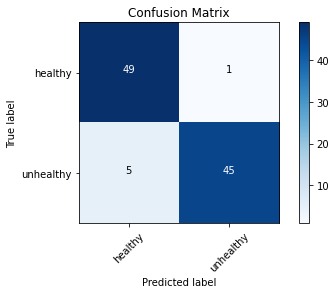

In [98]:
# and let's use the function

cm_plot_labels = ['healthy','unhealthy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## VGG16_Model
A lot more complicated that the CNN model that we tried in the previous section and with a lot more layers

### Creating the adapted model

In [60]:
# importing the model

vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 52s 0us/step


In [61]:
# let's have a look at the info of the model

vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [62]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [83]:
'''we have replicated the entire vgg16_model (excluding the output layer) 
to a new Sequential model (adding the layers one by one)'''

modelP = Sequential()
for layer in vgg16_model.layers[:-1]:
    modelP.add(layer)

In [84]:
# freezing the weights of what was imported from VGG16

for layer in model.layers:
    layer.trainable = False

In [85]:
# we add the output layer that will identify healthy and unhealthy

modelP.add(Dense(units=2, activation='softmax'))

In [86]:
# optimise the data

modelP.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
# let's make sure it was modified like we wanted to

modelP.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Fitting the adapted model

In [88]:
# let's fit the model now 
#(same as before but with reduced epochs, we don't wanna crash the PC)

modelP.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Train for 100 steps, validate for 20 steps
Epoch 1/5
100/100 - 653s - loss: 0.5383 - accuracy: 0.7990 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2/5
100/100 - 637s - loss: 0.0683 - accuracy: 0.9840 - val_loss: 0.0283 - val_accuracy: 0.9950
Epoch 3/5
100/100 - 649s - loss: 0.0319 - accuracy: 0.9930 - val_loss: 0.0166 - val_accuracy: 0.9950
Epoch 4/5
100/100 - 680s - loss: 0.0768 - accuracy: 0.9890 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/5
100/100 - 688s - loss: 0.0026 - accuracy: 0.9990 - val_loss: 2.9964e-04 - val_accuracy: 1.0000


### Save the Model

In [100]:
modelApples.save('modelApples.h5')

EOFError: Ran out of input

### Predictions + Confusion Matrix

In [95]:
predictions = modelP.predict(x=test_batches, steps=len(test_batches), verbose=0)

Confusion matrix, without normalization
[[50  0]
 [ 0 50]]


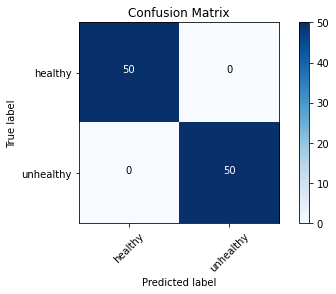

In [99]:
# we are using the confusion matrix creator function that we ran for the simpler model

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['healthy','unhealthy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# well, it has identified all the test correctly, impresive